FINAL:
Best position (formatted): ['-0.00004', '0.00011']
Best error (formatted): 0.00000


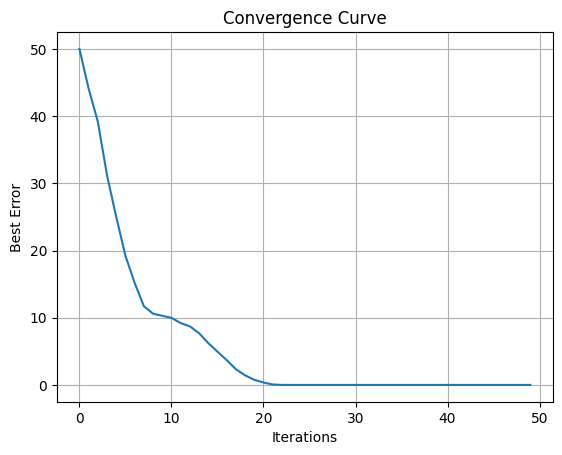

In [1]:
#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math
import matplotlib.pyplot as plt

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total = 0
    for i in range(len(x)):
        total += x[i] ** 2
    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self, x0):
        self.position_i = []  # particle position
        self.velocity_i = []  # particle velocity
        self.pos_best_i = []  # best position individual
        self.err_best_i = -1  # best error individual
        self.err_i = -1  # error individual

        for i in range(0, num_dimensions):
            self.velocity_i.append(random.uniform(-1, 1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self, costFunc):
        self.err_i = costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i == -1:
            self.pos_best_i = list(self.position_i)
            self.err_best_i = self.err_i

    # update new particle velocity
    def update_velocity(self, pos_best_g):
        w = 0.5  # constant inertia weight (how much to weigh the previous velocity)
        c1 = 1  # cognitive constant
        c2 = 2  # social constant

        for i in range(0, num_dimensions):
            r1 = random.random()
            r2 = random.random()

            vel_cognitive = c1 * r1 * (self.pos_best_i[i] - self.position_i[i])
            vel_social = c2 * r2 * (pos_best_g[i] - self.position_i[i])
            self.velocity_i[i] = w * self.velocity_i[i] + vel_cognitive + vel_social

    # update the particle position based off new velocity updates
    def update_position(self, bounds):
        for i in range(0, num_dimensions):
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i] > bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]


class PSO():
    def __init__(self, costFunc, x0, bounds, num_particles, maxiter):
        global num_dimensions

        num_dimensions = len(x0)
        err_best_g = -1  # best error for group
        pos_best_g = []  # best position for group
        convergence_curve = []  # To store the error values over iterations

        # establish the swarm
        swarm = []
        for i in range(0, num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i = 0
        while i < maxiter:
            # cycle through particles in swarm and evaluate fitness
            for j in range(0, num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g = list(swarm[j].position_i)
                    err_best_g = float(swarm[j].err_i)

            # cycle through swarm and update velocities and positions
            for j in range(0, num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)

            # Record the best error at each iteration for the convergence curve
            convergence_curve.append(err_best_g)
            i += 1

        # print final results
        print("FINAL:")
        # Assuming pos_best_g is a list of values
        formatted_pos_best_g = ["{:.5f}".format(value) for value in pos_best_g]
        print("Best position (formatted):", formatted_pos_best_g)
        print("Best error (formatted): {:.5f}".format(err_best_g))

        # Plotting the convergence curve
        plt.figure()
        plt.plot(convergence_curve)
        plt.title('Convergence Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Best Error')
        plt.grid(True)
        plt.show()

#--- RUN ----------------------------------------------------------------------+

initial = [5, 5]                                # initial starting location [x1,x2...]
bounds = [(-10, 10), (-10, 10)]     # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1, initial, bounds, num_particles=15, maxiter=50)